# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

## Data Retervial..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ecommerce_data.csv",encoding="latin1")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### From the information it is evident that there are total of 8 attributes and 5,41,909 values which describes stockcode, description, quantity, date, price and many more 

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### From the desciptive statistics it is clear that there are 3 numerical columns which are quantity, price and customer id, Moreover two points that i can mention are: 
#### 1. There are some outliers and missing values. Lets walk into minimum value of quantity which is (-80995) and minimum value of unit price (-11062), which are outliers as quanity and price cannot be in negative. And second thing is second half quartile which is 75th and maximum value has much more difference.
#### 2. If we had a look at count of Customerid and quantity we can see some difference as there are some missing values in customerid

In [5]:
### Total columns in the data frame
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## lets dive into preprocessing...

In [6]:
### Missing Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### From the dataframe it is evident that there are some nulls in customerid and description

In [7]:
# Dataframe of description missing value
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


#### From the above data frame it is clear that for every missing value of description there is missing value of customerid, So dropping this is the best choice

In [8]:
df=df.dropna(subset=['Description'])

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

#### From the description it is evident that, we had handled description and need to perform operation for CustomerID

In [10]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [11]:
df=df.dropna(subset=['CustomerID'])

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### So we had sucessfully handled nulls, lets proceed with duplicates.

In [13]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


#### So there are no duplicates in the data frame, lets proceed with outliers

In [14]:
from scipy import stats
z_df=df.select_dtypes(include=[np.number])
z_scores = stats.zscore(z_df)
outliers = np.where(np.abs(z_scores) > 3)
print(np.unique(outliers[0]))

[  3102   3645   3740   3741   3784   4286  10234  10938  10939  10946
  10947  12517  12760  13220  13329  16891  22043  22229  24190  25239
  26017  28939  32882  32918  33073  33074  33075  33076  33645  33646
  33647  33707  38120  38125  39034  45380  48181  51157  51269  52241
  52244  52581  54994  54995  54996  55571  55892  56298  57188  57838
  59194  62984  62985  63331  65021  70086  70089  70090  70091  70141
  72532  72534  74087  76098  78283  78284  78285  78286  79700  80085
  82325  82328  82329  84449  84450  88623  91202  95244  96422  97537
  97539  97580  97586  97818  98258  99563  99564  99565  99566  99568
  99569  99570  99571 100107 100108 103771 104088 104098 106353 107572
 107574 111930 111937 112369 112370 112371 112372 112435 112436 112438
 112439 114611 114612 114614 114615 116166 117910 119052 119054 119486
 119775 121297 121396 121405 124818 128133 128170 128379 130369 130902
 131075 131836 131861 132356 132357 136950 136951 139134 142723 142724
 14311

In [15]:
df=df.drop(df.index[np.unique(outliers[0])])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Lets start with encoding categorical variables and transforming data types

In [16]:
# We cannot encode Description into different types like creating dummies as there are many of them 
df.Description.nunique()

3893

In [17]:
df.Country.nunique()

37

In [18]:
### So, for Stockcode ,description, Country we will proceed with label emcoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['StockCode']=le.fit_transform(df['StockCode'])
df['Description']=le.fit_transform(df['Description'])
df['Country']=le.fit_transform(df['Country'])

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,3247,3713,6,12/1/2010 8:26,2.55,17850.0,35
1,536365,2647,3721,6,12/1/2010 8:26,3.39,17850.0,35
2,536365,2853,861,8,12/1/2010 8:26,2.75,17850.0,35
3,536365,2801,1813,6,12/1/2010 8:26,3.39,17850.0,35
4,536365,2800,2774,6,12/1/2010 8:26,3.39,17850.0,35
...,...,...,...,...,...,...,...,...
541904,581587,1470,2263,12,12/9/2011 12:50,0.85,12680.0,13
541905,581587,1746,695,6,12/9/2011 12:50,2.10,12680.0,13
541906,581587,2086,701,4,12/9/2011 12:50,4.15,12680.0,13
541907,581587,2087,700,4,12/9/2011 12:50,4.15,12680.0,13


### Feature ENgineering..

In [20]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Date_since_last_purchase']=df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (x.max()-x).dt.days)
df['Amount_Spent']=df['Quantity']*df['UnitPrice']
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_since_last_purchase,Amount_Spent,Year,Month
0,536365,3247,3713,6,2010-12-01 08:26:00,2.55,17850.0,35,71,15.30,2010,12
1,536365,2647,3721,6,2010-12-01 08:26:00,3.39,17850.0,35,71,20.34,2010,12
2,536365,2853,861,8,2010-12-01 08:26:00,2.75,17850.0,35,71,22.00,2010,12
3,536365,2801,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,71,20.34,2010,12
4,536365,2800,2774,6,2010-12-01 08:26:00,3.39,17850.0,35,71,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,1470,2263,12,2011-12-09 12:50:00,0.85,12680.0,13,0,10.20,2011,12
541905,581587,1746,695,6,2011-12-09 12:50:00,2.10,12680.0,13,0,12.60,2011,12
541906,581587,2086,701,4,2011-12-09 12:50:00,4.15,12680.0,13,0,16.60,2011,12
541907,581587,2087,700,4,2011-12-09 12:50:00,4.15,12680.0,13,0,16.60,2011,12


### Visualization STarts..

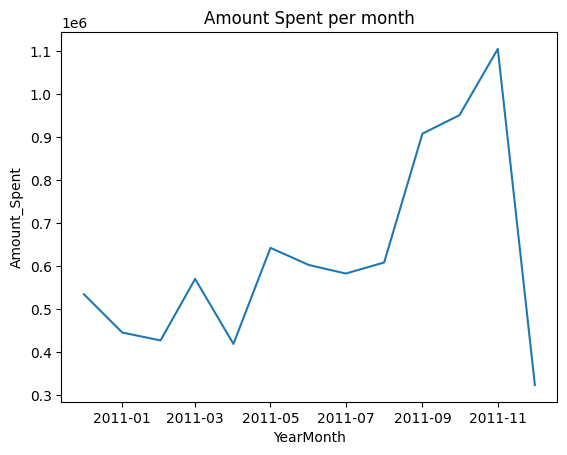

In [22]:
df_amount=df.groupby(['Year','Month'],as_index=False)['Amount_Spent'].sum()
df_amount['YearMonth'] = pd.to_datetime(df_amount[['Year', 'Month']].assign(day=1))
sns.lineplot(data=df_amount, x='YearMonth',y='Amount_Spent')
plt.title("Amount Spent per month")
plt.show()

In [23]:
df_amount['YearMonth'].unique()

<DatetimeArray>
['2010-12-01 00:00:00', '2011-01-01 00:00:00', '2011-02-01 00:00:00',
 '2011-03-01 00:00:00', '2011-04-01 00:00:00', '2011-05-01 00:00:00',
 '2011-06-01 00:00:00', '2011-07-01 00:00:00', '2011-08-01 00:00:00',
 '2011-09-01 00:00:00', '2011-10-01 00:00:00', '2011-11-01 00:00:00',
 '2011-12-01 00:00:00']
Length: 13, dtype: datetime64[ns]

#### From the visualization it is evident that, amount_spent in december 2010 is almost 5,50,000 as month passes it has a downward trend followed with upward trend and furthermore amount that are spent are almost doubled from september till november and suddenly it sees a drastic down fall with almost 80% loss

### Lets work on what are the five most sold items and how many quantities are sold..

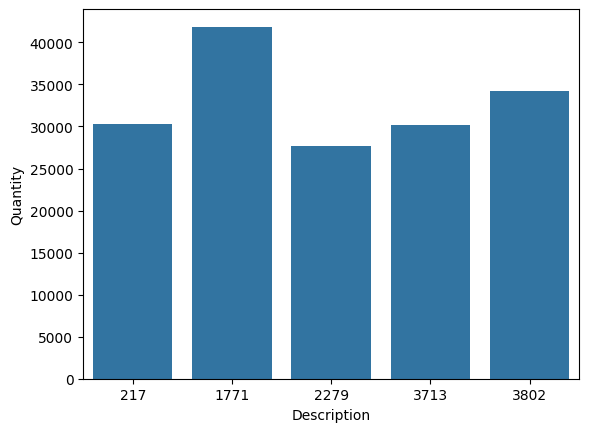

In [24]:
df_sold=df.groupby('Description')['Quantity'].sum()
df_sold=df_sold.sort_values(ascending=False)
df_t5=df_sold[:5]
df_t5 = df_t5.reset_index()
sns.barplot(data=df_t5,y="Quantity",x="Description")
plt.show()

#### From the Graph we can see that item with number 1771 has highest salary of 40,000, next comes with item with number 3802 with almost 35,000 quantities sold.
#### 1771- JUMBO  BAG BAROQUE BLACK WHITE
#### 3802- WORLD WAR 2 GLIDERS ASSTD DESIGNS
#### 217- ASSORTED COLOUR BIRD ORNAMENT
#### 3713- WHITE HANGING HEART T-LIGHT HOLDER
#### 2279- PACK OF 72 RETROSPOT CAKE CASES

### lets work on top 10 countries who had the highest average amount spent

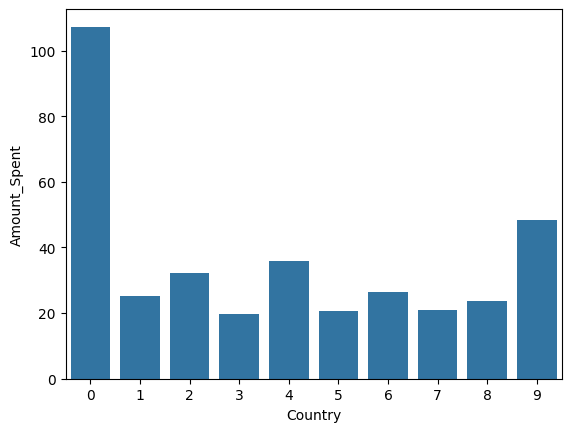

In [25]:
df_country=df.groupby("Country")["Amount_Spent"].mean()
df_country_5=df_country[:10].sort_values(ascending=False)
df_country_5=df_country_5.reset_index()
df_country_5
sns.barplot(data=df_country_5,x="Country",y="Amount_Spent")
plt.show()

### From the graph it is evident that Country Code 0 has highest average amount spent which is almost 110 dollars and followed with which has an average of 50 dollars spent and further more with country code 4 with almost 40 dollars spent on average transcation

#### 0- Australia
#### 9- Denmark
#### 4- Brazil
#### 2- Bahrain
#### 6- Channel ISlands
#### 1- Austria
#### 8- Czech Republic
#### 5- CAnada
#### 7- Cyprus
#### 3- Belgium

### Feature Selection Using Correlation Matrix For Numerical

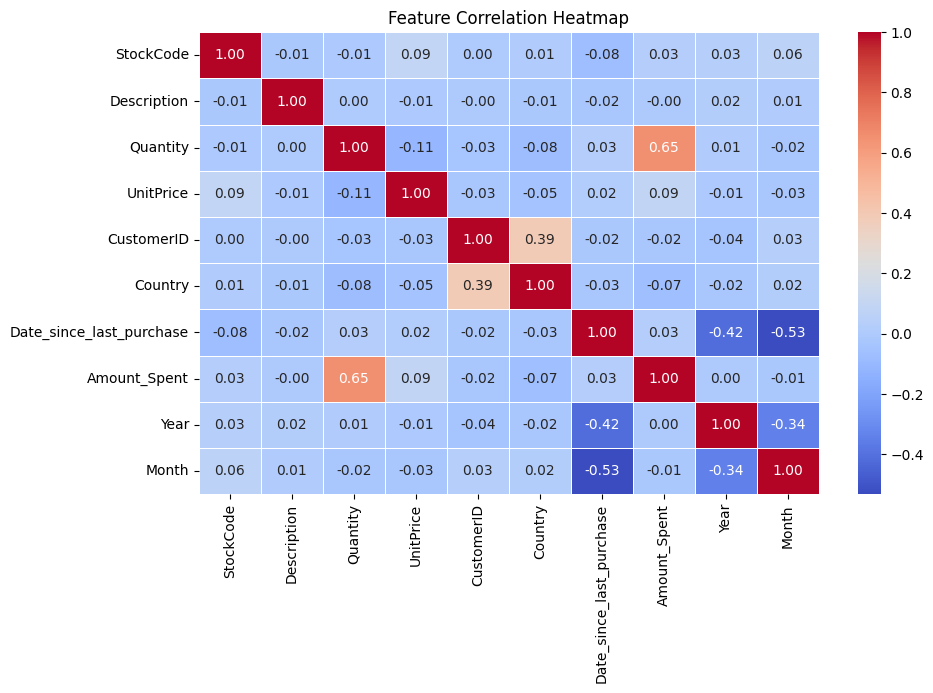

In [26]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
threshold = 0.85

correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("Highly Correlated Features to Drop:", correlated_features)

Highly Correlated Features to Drop: set()


### Feature Selection Using Correlation Matrix For Categorical

In [28]:
#Invoice-Date will not contribute to customer segementation so removing it
#df=df.drop(columns='InvoiceDate',axis=1)

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

encoded_df = df.copy()
for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

X_cat = encoded_df[categorical_cols]

mi_scores = mutual_info_regression(X_cat, df['Amount_Spent'])

mi_results = pd.DataFrame({'Feature': categorical_cols, 'MI Score': mi_scores})
mi_results.sort_values(by='MI Score', ascending=False, inplace=True)

print(mi_results)

     Feature  MI Score
0  InvoiceNo  0.834701


In [31]:
df=df.drop(columns=['InvoiceNo', 'StockCode', 'Description','InvoiceDate'],axis=1)

In [32]:
df

,Quantity,UnitPrice,CustomerID,Country,Date_since_last_purchase,Amount_Spent,Year,Month
0,6,2.55,17850.0,35,71,15.30,2010,12
1,6,3.39,17850.0,35,71,20.34,2010,12
2,8,2.75,17850.0,35,71,22.00,2010,12
3,6,3.39,17850.0,35,71,20.34,2010,12
4,6,3.39,17850.0,35,71,20.34,2010,12
...,...,...,...,...,...,...,...,...
541904,12,0.85,12680.0,13,0,10.20,2011,12
541905,6,2.10,12680.0,13,0,12.60,2011,12
541906,4,4.15,12680.0,13,0,16.60,2011,12
541907,4,4.15,12680.0,13,0,16.60,2011,12
